In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import gridplot
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv("mc_san_gaia_lam.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
m = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) & np.isfinite(df.vz.values)
m &= (-100 < df.vx.values) & (df.vx.values < 150)
m &= (100 < df.vy.values) & (df.vy.values < 350)
m &= (-100 < df.vz.values) & (df.vz.values < 100)
vx, vy, vz = df.vx.values[m], df.vy.values[m], df.vz.values[m]
teff, prot, age = df.color_teffs.values[m], df.Prot.values[m], df.age.values[m]
ra, dec = df.ra.values[m], df.dec.values[m]
dist = df.r_est.values[m]
x, y, z = df.x.values[m], df.y.values[m], df.z.values[m]

In [74]:
young = age < 1.5

In [76]:
source = ColumnDataSource(data=dict(vx=vx[young], vy=vy[young], vz=vz[young], teff=teff[young], prot=prot[young], age=age[young]))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(-100, 150), y_range=(100, 350))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='vx', y='vy', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
left.xaxis.axis_label = 'vx [km/s]'
left.yaxis.axis_label = 'vy [km/s]'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

In [84]:
from astropy.coordinates import SkyCoord
c = SkyCoord('20h03m55s', '+44d09m30s', frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (300.97916667, 44.15833333)>

In [82]:
print(max(ra), min(ra), max(dec), min(dec))

301.78771605265337 279.7402387258627 52.3144379826776 36.62270884364944


In [85]:
source = ColumnDataSource(data=dict(ra=ra[young], dec=dec[young], teff=teff[young], prot=prot[young], age=age[young]))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(270, 302), y_range=(35, 55))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='ra', y='dec', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
left.xaxis.axis_label = 'ra'
left.yaxis.axis_label = 'dec'
left.circle(x=300.972, y=44.158, size=10)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

In [106]:
tidy = (-5 < vx[young]) & (vx[young] < 50) & (200 < vy[young]) & (vy[young] < 250)

source = ColumnDataSource(data=dict(x=x[young][tidy], y=y[young][tidy], teff=teff[young][tidy],
                                    prot=prot[young][tidy], age=age[young][tidy]))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(-8.13, -7.8), y_range=(0, 1))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='x', y='y', color=transform('age', color_mapper), size=4, alpha=0.6, source=source)
left.xaxis.axis_label = 'x'
left.yaxis.axis_label = 'y'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

In [107]:
source = ColumnDataSource(data=dict(x=x[young][tidy], z=z[young][tidy], teff=teff[young][tidy],
                                    prot=prot[young][tidy], age=age[young][tidy]))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(-8.13, -7.8), y_range=(0, 0.4))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='x', y='z', color=transform('age', color_mapper), size=4, alpha=0.6, source=source)
left.xaxis.axis_label = 'x'
left.yaxis.axis_label = 'z'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

In [108]:
source = ColumnDataSource(data=dict(z=z[young][tidy], y=y[young][tidy], teff=teff[young][tidy],
                                    prot=prot[young][tidy], age=age[young][tidy]))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(0, 1), y_range=(0, 0.25))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='y', y='z', color=transform('age', color_mapper), size=4, alpha=0.6, source=source)
left.xaxis.axis_label = 'y'
left.yaxis.axis_label = 'z'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=2, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

Text(0.5, 1.0, 'Old (Age > 1.5 Gyr)')

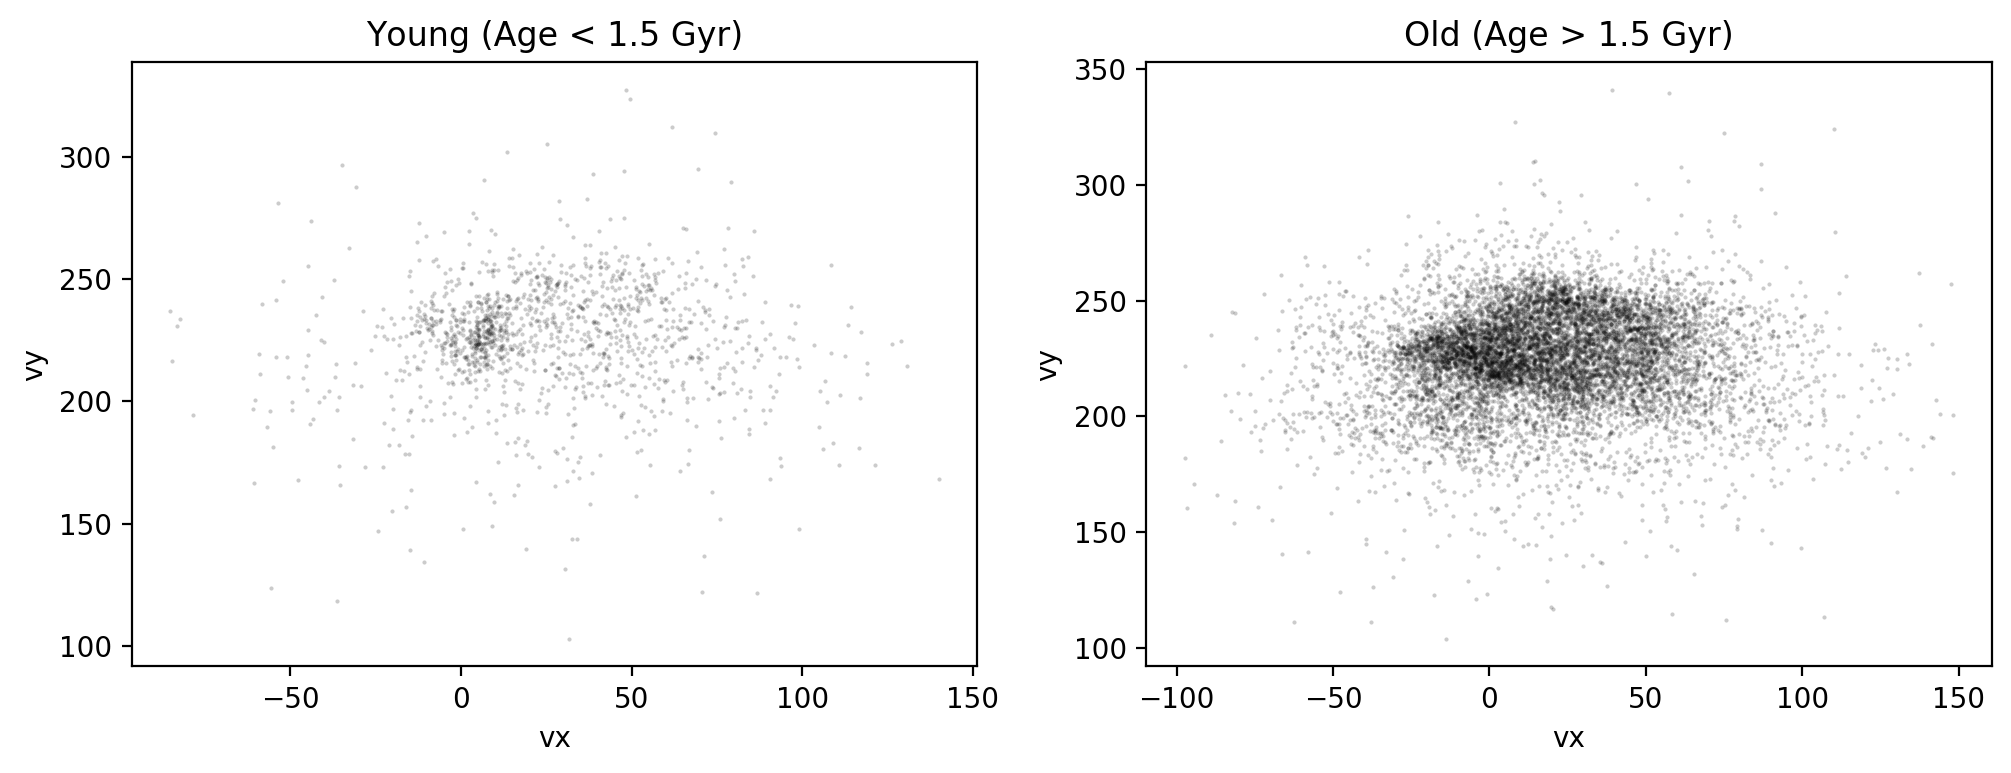

In [72]:
young = age < .3
xs = np.linspace(-100, 150)
fig = plt.figure(figsize=(12, 4), dpi=200)
ax0 = fig.add_subplot(121)
ax0.plot(vx[young], vy[young], "k.", ms=1, alpha=.2)
# ax0.plot(xs, 218 + -.3*xs, "k-", lw=.5)
ax0.set_xlabel("vx")
ax0.set_ylabel("vy")
ax0.set_title("Young (Age < 1.5 Gyr)")
ax1 = fig.add_subplot(122)
ax1.plot(vx[~young], vy[~young], "k.", ms=1, alpha=.2)
# ax1.plot(xs, 218 + -.3*xs, "k-", lw=.5)
ax1.set_xlabel("vx")
ax1.set_ylabel("vy")
ax1.set_title("Old (Age > 1.5 Gyr)")

Text(0.5, 0, 'Age [Gyr]')

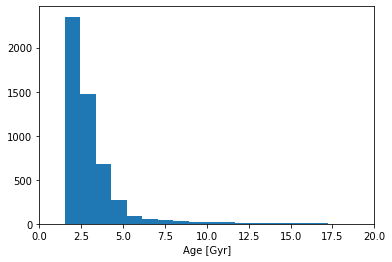

In [47]:
plt.hist(age[~young], 100)
plt.xlim(0, 20)
plt.xlabel("Age [Gyr]")

In [26]:
TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(-100, 150), y_range=(-100, 100))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='vx', y='vz', color=transform('age', color_mapper), size=3, alpha=0.6, source=source)
left.xaxis.axis_label = 'vx'
left.yaxis.axis_label = 'vz'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=3, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)

In [27]:
TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=500, height=400, x_range=(100, 350), y_range=(-100, 100))
color_mapper = LinearColorMapper(palette="Plasma256", low=2, high=2.1)

left.circle(x='vy', y='vz', color=transform('age', color_mapper), size=3, alpha=0.6, source=source)
left.xaxis.axis_label = 'vy'
left.yaxis.axis_label = 'vz'

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=500, height=400, y_axis_type="log", x_range=(7500, 3000), y_range=(1, 80))
right.circle(x='teff', y='prot', color=transform('age', color_mapper), size=3, alpha=0.6, source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
right.add_layout(color_bar, 'right')
right.xaxis.axis_label = 'Teff [K]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

show(p)